## Names and ID's: ##
Omer Ben Salmon:318324811<br>
Gal Levy: 318530110<br>
Ofeck Cohen: 206946873<br>

### Imports ###

In [1]:
import subprocess
import sys
import os
curr_dir = os.getcwd()
requirements_file = os.path.join(curr_dir, 'requirements.txt')

try:
    print(f"Installing modules from {requirements_file}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", requirements_file])
    print("All required modules have been installed.")
except subprocess.CalledProcessError as e:
    print(f"An error occurred while installing modules: {e}")

Installing modules from /Users/omerbensalmon/Documents/BGU/semesters/Semester_6/courses/Introduction_to_graph_modules_and_DL/Home_Assgiments /FInal_project/project_code/requirements.txt...
Looking in indexes: https://pypi.python.org/simple, https://pypi.apple.com/simple
All required modules have been installed.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
from CROSR.dhr_nets import BaselineNet, DHRNet, save_DHRnet, load_DHRNet, save_baseline_model, load_baseline_model
from CROSR.data_utils import get_mnist_testloader, get_mnist_trainloader, get_combined_testloader, get_mnist_cifar10_testloader, get_mnist_fashionmnist_testloader
from CROSR.train_test_utils import get_device, train_basline_model, train_net
from CROSR.plot_utils import plot_baseline_loss_and_accuracy_over_epochs, plot_loss_over_epochs_train, plot_confusion_matrices, plot_rectangular_classification_v3
from CROSR.evaluation_utils import evaluate_model_on_mnist, compute_osr_metrics_binary, compute_osr_confusion_matrix_11_classes, evaluate_osr_model
from CROSR.weibull_distribution_utils import set_tail_size


#### is training var, by defaults is true ####

In [3]:
is_training = False

#### Data sets and Data laoders init ####

In [4]:
mnist_trainloader = get_mnist_trainloader()
baseline_testloader = get_mnist_testloader()
osr_testloader = get_combined_testloader()
mnist_cifar_testloader = get_mnist_cifar10_testloader()
mnist_fashion_testloader = get_mnist_fashionmnist_testloader()

Files already downloaded and verified
Files already downloaded and verified


#### Models ####


In [5]:
if is_training:
  baseline_model = BaselineNet()
  osr_model = DHRNet()
else:
  baseline_model = load_baseline_model()
  osr_model = load_DHRNet()

### training procedure ###


In [6]:
device = get_device()
set_tail_size(650)
if is_training:
  basline_model, accuracy_and_loss_basline_over_epochs = train_basline_model(baseline_model, mnist_trainloader, device, num_epochs=10)
  osr_model, accuracy_and_losses = train_net(osr_model, mnist_trainloader, device, num_epochs=10)
  loss_baseline_over_epochs, accuracy_baseline_over_epochs = accuracy_and_loss_basline_over_epochs
  osr_model_train_accuracies, osr_model_cross_entropy_losses, osr_model_reconstruction_losses, osr_model_total_losses = accuracy_and_losses
  plot_baseline_loss_and_accuracy_over_epochs(loss_history=loss_baseline_over_epochs, accuracy_history=accuracy_baseline_over_epochs)
  plot_loss_over_epochs_train(osr_model_train_accuracies, osr_model_cross_entropy_losses, osr_model_reconstruction_losses, osr_model_total_losses, title='osr model accuracy and loss over epochs')

Setting tail size to :650


### Evaluation ###


In [11]:
baseline_eval_score, baseline_cm = evaluate_model_on_mnist(baseline_model, baseline_testloader, device)
all_labels, all_preds, overall_accuracy = evaluate_osr_model(osr_model, osr_testloader, device)
all_labels_mnist_cifar, all_preds_mnist_cifar, overall_accuracy_mnist_cifar = evaluate_osr_model(osr_model, mnist_cifar_testloader, device)
all_labels_mnist_fashion, all_preds_mnist_fashion, overall_accuracy_mnist_fashion = evaluate_osr_model(osr_model, mnist_fashion_testloader, device)
cm_binary, in_dist_accuracy, ood_accuracy = compute_osr_metrics_binary(all_preds=all_preds, all_labels=all_labels)
cm_binary_mnist_cifar, in_dist_accuracy_mnist_cifar, ood_accuracy_mnist_cifar = compute_osr_metrics_binary(all_preds=all_preds_mnist_cifar, all_labels=all_labels_mnist_cifar)
cm_binary_mnist_fashion, in_dist_accuracy_mnist_fashion, ood_accuracy_mnist_fshion = compute_osr_metrics_binary(all_preds=all_preds_mnist_fashion, all_labels=all_labels_mnist_fashion)
osr_cm_all_classes = compute_osr_confusion_matrix_11_classes(all_preds=all_preds, all_labels=all_labels)
osr_cm_all_classes_mnist_cifar = compute_osr_confusion_matrix_11_classes(all_preds=all_preds_mnist_cifar, all_labels=all_labels_mnist_cifar)
osr_cm_all_classes_mnist_fashion = compute_osr_confusion_matrix_11_classes(all_preds=all_preds_mnist_fashion, all_labels=all_labels_mnist_fashion)

### plots ###

The BaseLine accuracy is:0.983
The OSR model accuracy is:0.5752, The in disterbution accuracy is:0.6003333333333334 and the OOD accuracy is:0.592


/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-pa

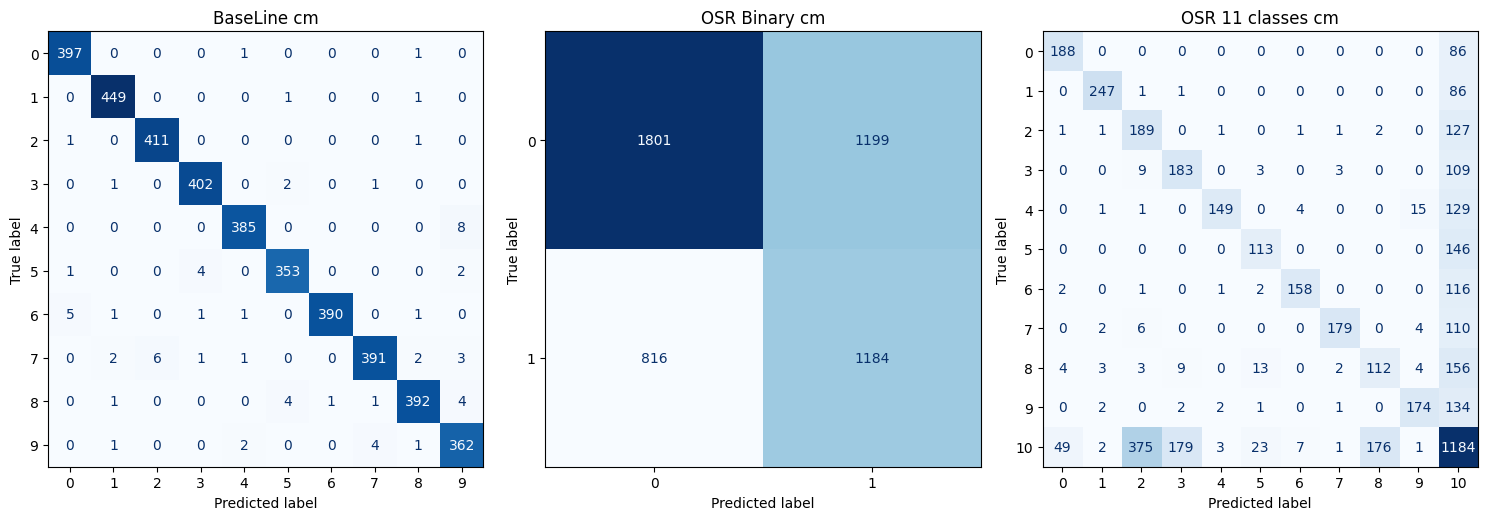

In [12]:
cm_list = [baseline_cm, cm_binary, osr_cm_all_classes]
titels = ['BaseLine cm', 'OSR Binary cm', 'OSR 11 classes cm']
print(f'The BaseLine accuracy is:{baseline_eval_score}\nThe OSR model accuracy is:{overall_accuracy}, The in disterbution accuracy is:{in_dist_accuracy} and the OOD accuracy is:{ood_accuracy}')
plot_confusion_matrices(cm_list, titels)

The cifar-10 only accuracy is:0.57
, The in disterbution accuracy is:0.609 and the OOD accuracy is:0.541
The fashion mnist only only accuracy is:0.59375
The ib disterbution accuracy for fashion mnist only is:0.619, The ood accuracy for fashion mnist only is:0.617


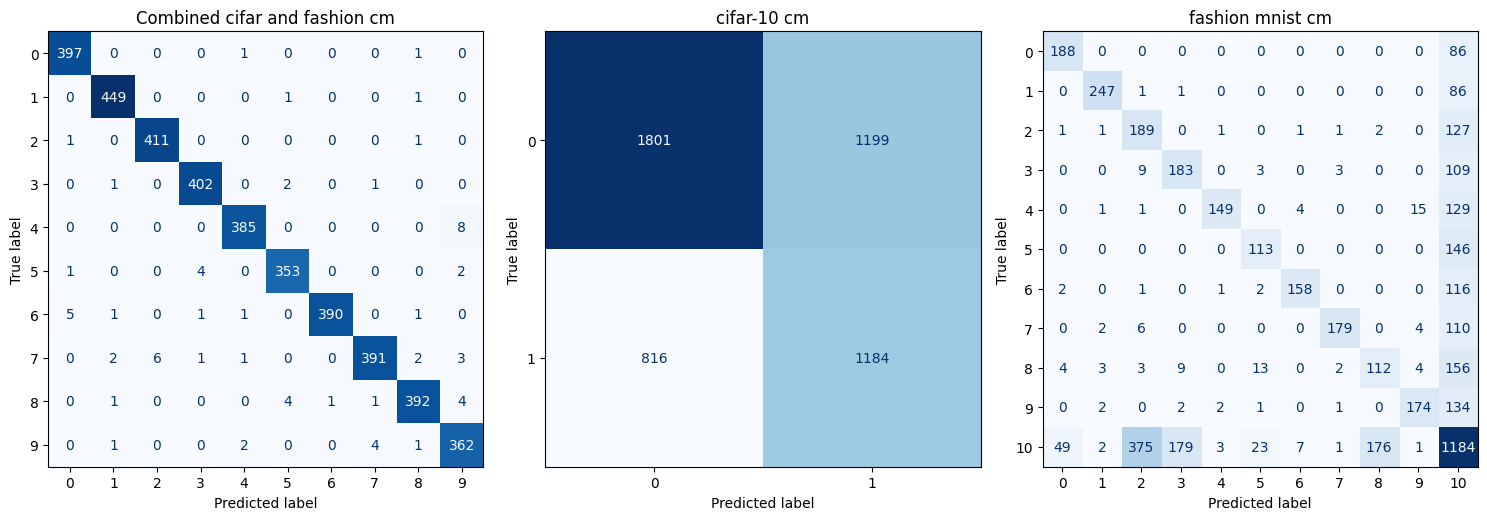

In [13]:
cm_list_ood = [cm_binary, cm_binary_mnist_cifar, cm_binary_mnist_fashion]
titels = ['Combined cifar and fashion cm', 'cifar-10 cm', 'fashion mnist cm']
print(f'The cifar-10 only accuracy is:{overall_accuracy_mnist_cifar}\n, The in disterbution accuracy is:{in_dist_accuracy_mnist_cifar} and the OOD accuracy is:{ood_accuracy_mnist_cifar}')
print(f'The fashion mnist only only accuracy is:{overall_accuracy_mnist_fashion}\nThe ib disterbution accuracy for fashion mnist only is:{in_dist_accuracy_mnist_fashion}, The ood accuracy for fashion mnist only is:{ood_accuracy_mnist_fshion}')
plot_confusion_matrices(cm_list, titels)

In [29]:
save_DHRnet(osr_model)
save_baseline_model(baseline_model)

/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/omerbensalmon/Library/Python/3.11/lib/python/site-pa

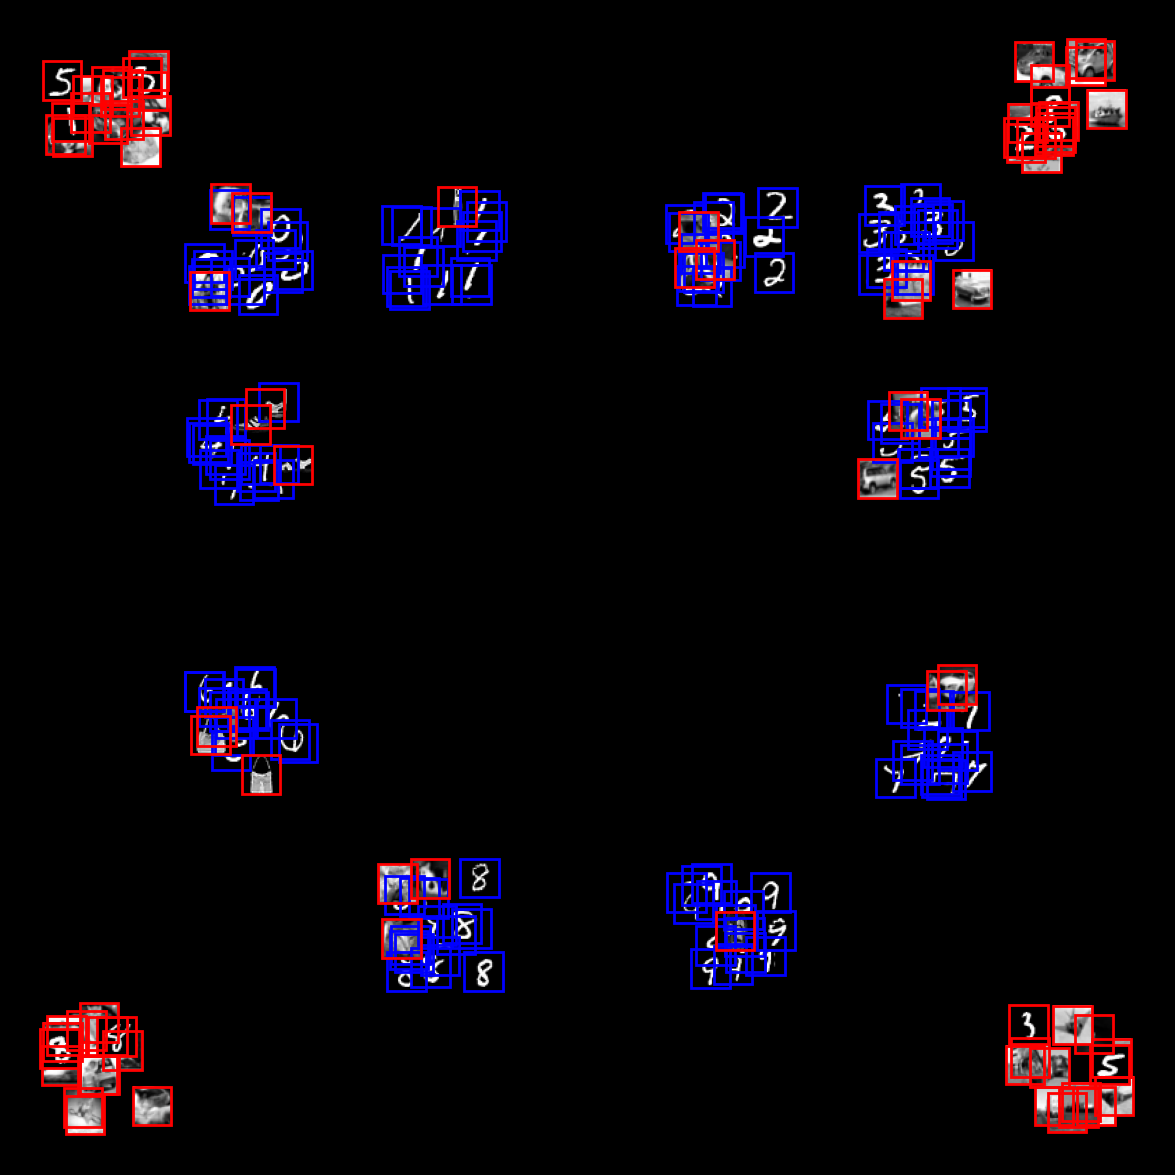

In [7]:
plot_rectangular_classification_v3(osr_model, osr_testloader)